In [1]:
import requests
import json
import pandas as pd
import statsmodels.tsa.api as tsa
import statsmodels.api as sm
SECONDS_PER_DAY= 24 * 60 * 60
UNIX_START_DATE=1577836800
UNIX_TODAY = 1638811798
import matplotlib.pyplot as plt

In [2]:
r = requests.get(f"https://ftx.com/api/markets")
data = json.loads(r.text)
 

In [3]:
for market in data["result"]:
    if "SOL" in market["name"]:
        print(market)

{'name': 'MSOL/USD', 'enabled': True, 'postOnly': False, 'priceIncrement': 0.025, 'sizeIncrement': 0.01, 'minProvideSize': 0.01, 'last': 202.95, 'bid': 202.3, 'ask': 204.05, 'price': 202.95, 'type': 'spot', 'baseCurrency': 'MSOL', 'quoteCurrency': 'USD', 'underlying': None, 'restricted': False, 'highLeverageFeeExempt': True, 'change1h': 0.003833312724125139, 'change24h': 0.10179153094462541, 'changeBod': 0.019721140560231127, 'quoteVolume24h': 1865836.7, 'volumeUsd24h': 1865836.7}
{'name': 'SOL-PERP', 'enabled': True, 'postOnly': False, 'priceIncrement': 0.0025, 'sizeIncrement': 0.01, 'minProvideSize': 0.01, 'last': 199.1525, 'bid': 199.1125, 'ask': 199.115, 'price': 199.115, 'type': 'future', 'baseCurrency': None, 'quoteCurrency': None, 'underlying': 'SOL', 'restricted': False, 'highLeverageFeeExempt': False, 'change1h': 0.0031361386450369662, 'change24h': 0.1035734574829225, 'changeBod': 0.02116802359125585, 'quoteVolume24h': 726274633.217375, 'volumeUsd24h': 726274633.217375}
{'name

In [4]:
market_name = "SOL/USD"

def get_market_data(market_name,resolution=3600):
    r = requests.get(f"https://ftx.com/api/markets/{market_name}/candles?resolution={resolution}&start_time={UNIX_START_DATE}&end_time={UNIX_TODAY}")
    data = json.loads(r.text)
    df = pd.DataFrame.from_records(data["result"])
    df["time"] = pd.to_datetime(df['startTime']) 
    df.set_index('time', inplace=True) # set column 'date' to index
    df.sort_values(by=['time'], inplace=True)
    df["close_changes_pct"] = df["close"].pct_change()
    return df

In [5]:
df = get_market_data("SOL/USD")

In [65]:
df

,startTime,open,high,low,close,volume,close_changes_pct
time,,,,,,,
2021-10-05 06:00:00+00:00,2021-10-05T06:00:00+00:00,166.5500,168.0575,166.3375,166.8875,3.847178e+06,NaN
2021-10-05 07:00:00+00:00,2021-10-05T07:00:00+00:00,166.8875,167.7100,166.0775,166.1975,4.432857e+06,-0.004135
2021-10-05 08:00:00+00:00,2021-10-05T08:00:00+00:00,166.1975,167.2875,165.7350,167.1725,3.185694e+06,0.005867
2021-10-05 09:00:00+00:00,2021-10-05T09:00:00+00:00,167.1725,170.0000,165.5050,169.7725,6.989286e+06,0.015553
2021-10-05 10:00:00+00:00,2021-10-05T10:00:00+00:00,169.7725,170.0000,167.8125,168.2825,5.402847e+06,-0.008776
...,...,...,...,...,...,...,...
2021-12-06 13:00:00+00:00,2021-12-06T13:00:00+00:00,182.4500,184.5150,180.0000,181.8175,9.221799e+06,-0.003467
2021-12-06 14:00:00+00:00,2021-12-06T14:00:00+00:00,181.7900,184.0500,179.3850,180.2650,1.465350e+07,-0.008539
2021-12-06 15:00:00+00:00,2021-12-06T15:00:00+00:00,180.2650,188.5800,179.2900,188.4525,1.921776e+07,0.045419


<AxesSubplot:>

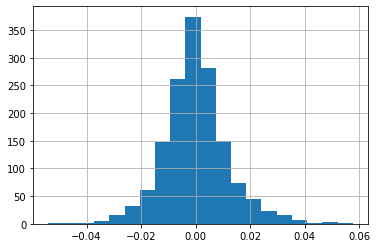

In [53]:
df["close_changes_pct"].hist(bins=20)

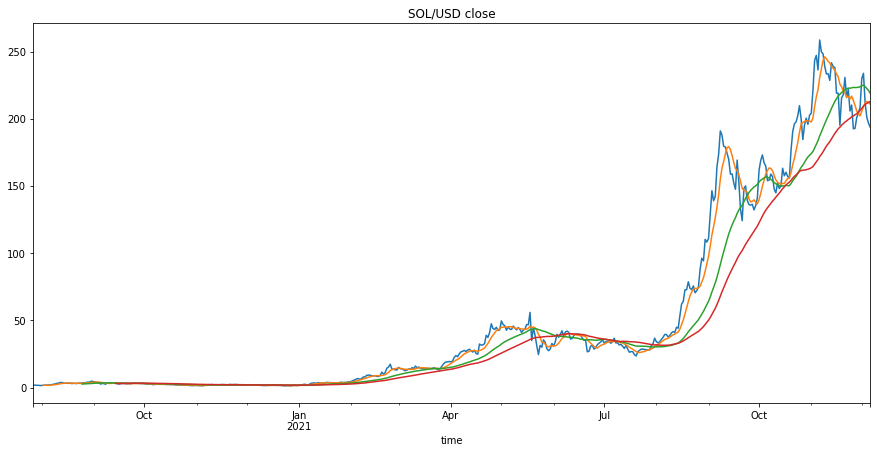

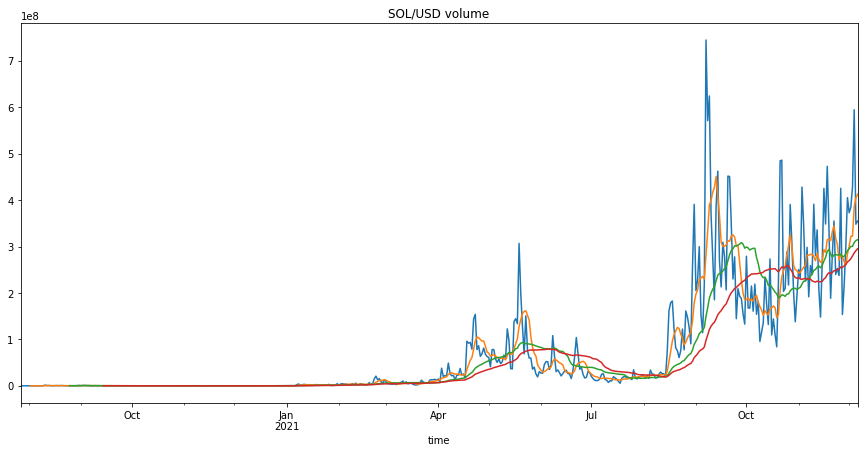

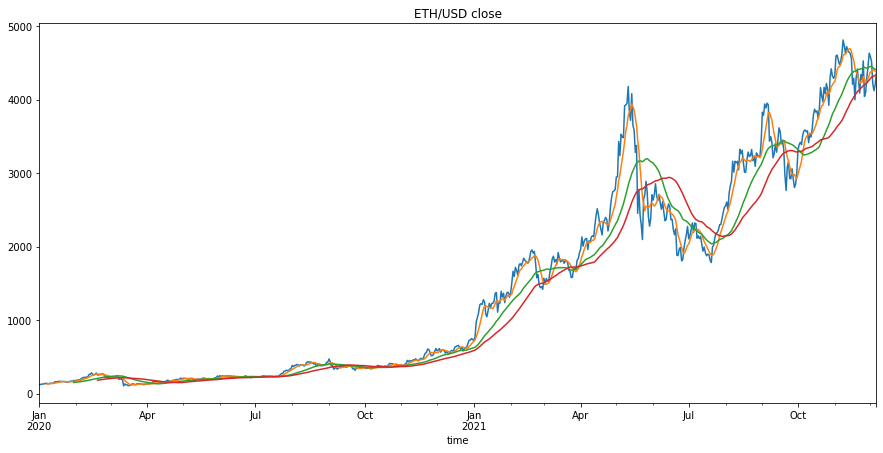

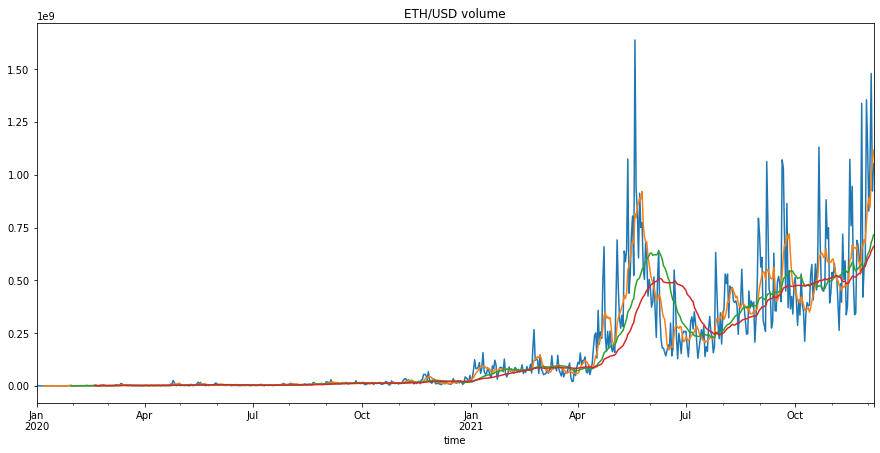

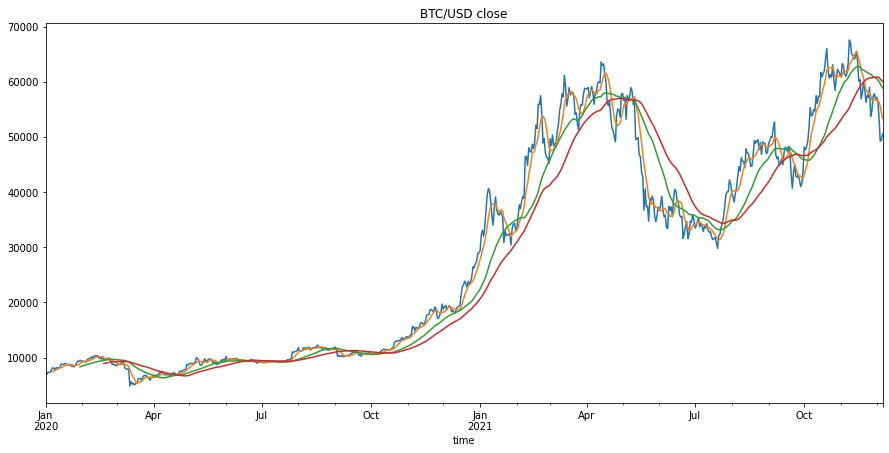

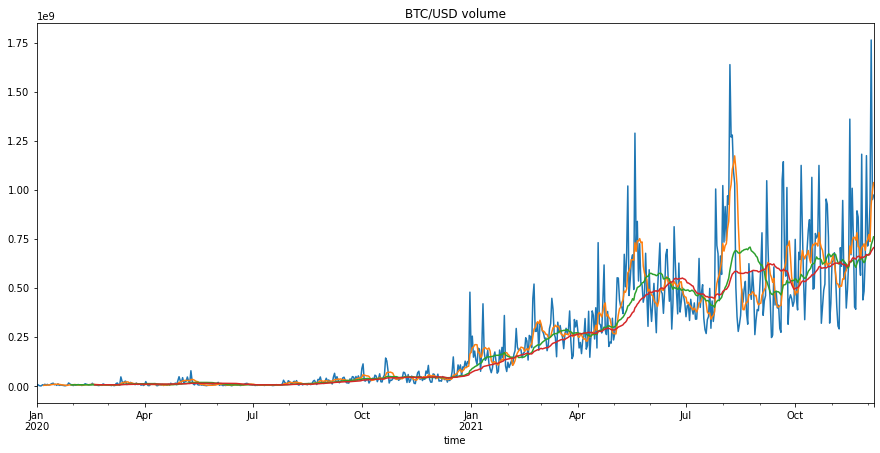

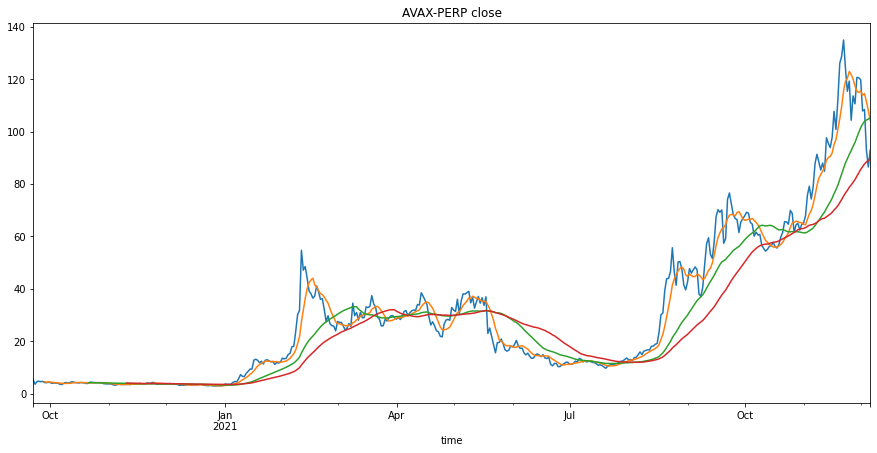

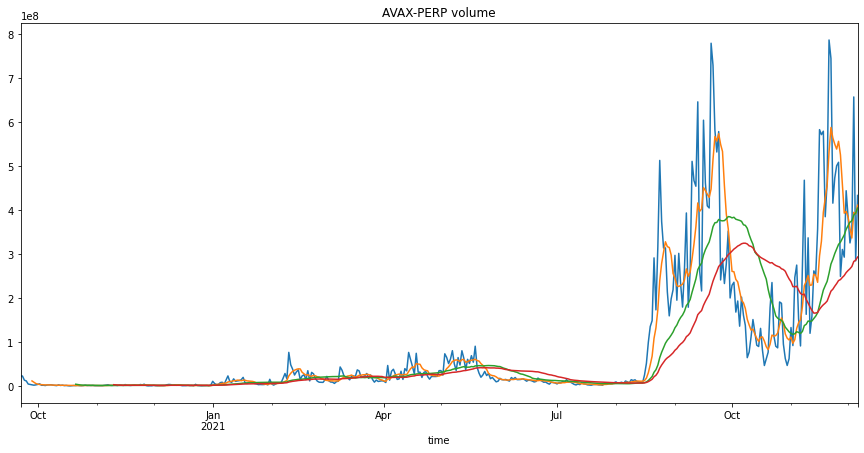

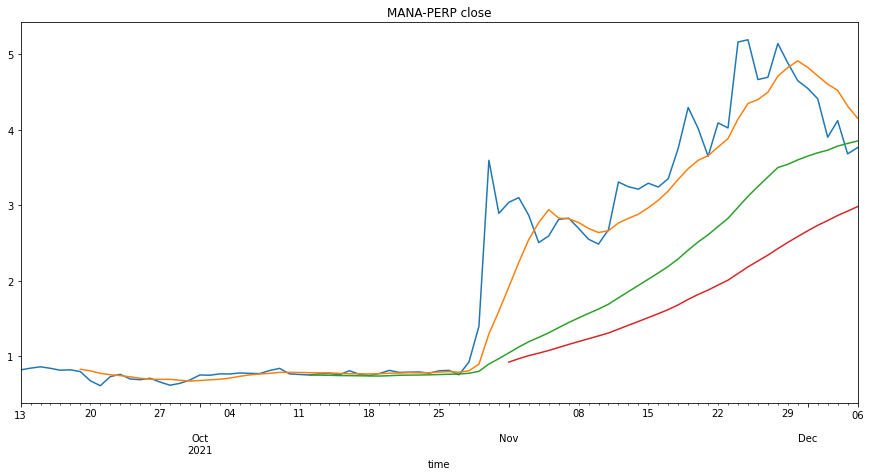

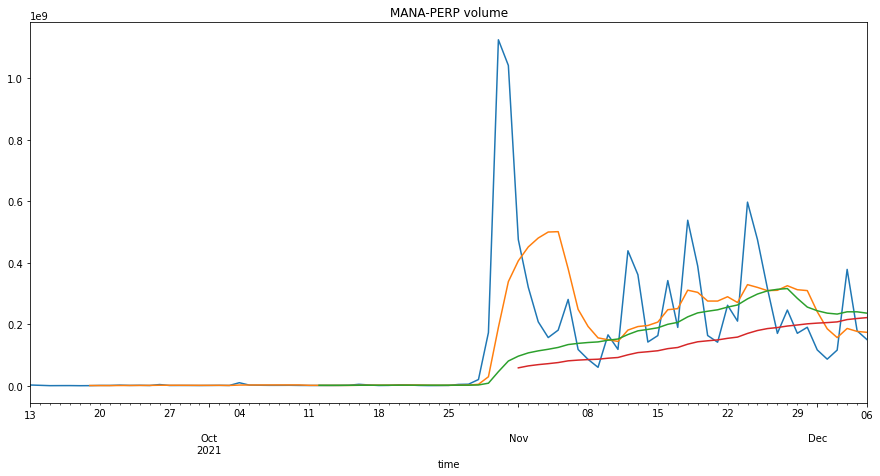

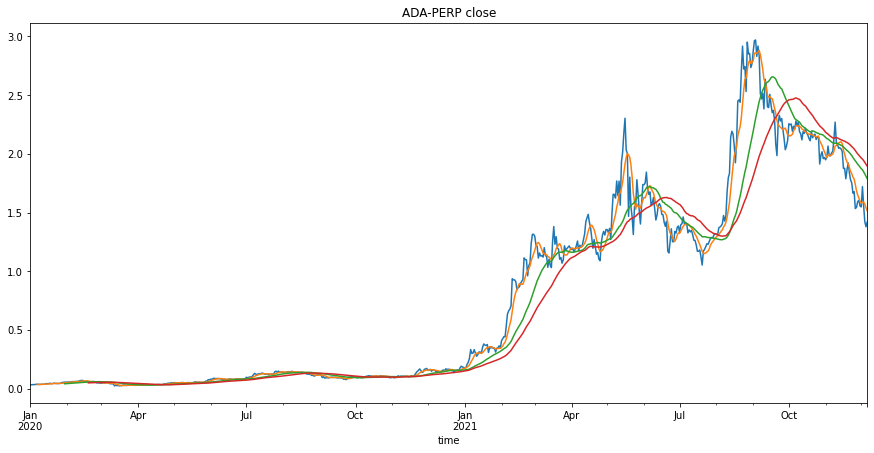

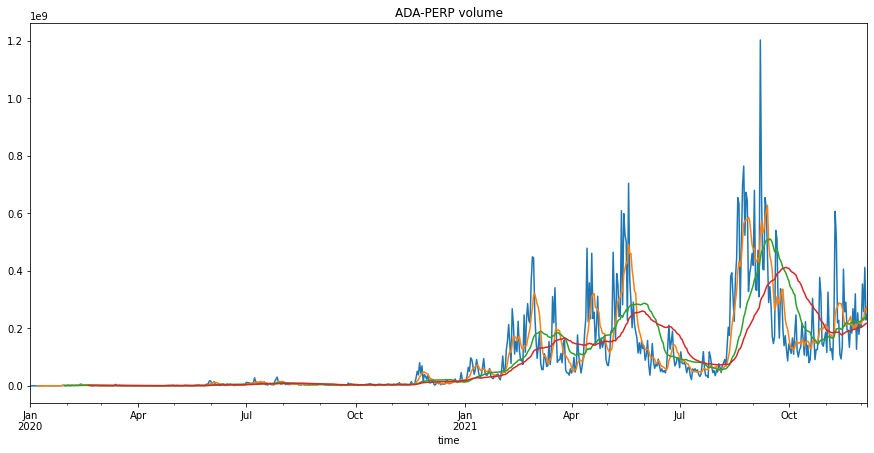

In [132]:

for market in ["SOL/USD","ETH/USD","BTC/USD","AVAX-PERP","MANA-PERP","ADA-PERP"]:
    df = get_market_data(market,resolution=SECONDS_PER_DAY)
    #df = df[df["startTime"] > "2021-06-01"]
    df["close"].plot(figsize=(15,7))
    for i in [7,30,50]:
        df["close"].rolling(window=i).mean().plot(figsize=(15,7))
    plt.title(market + " close")
    plt.show()
    df["volume"].plot(figsize=(15,7))
    for i in [7,30,50]:
        df["volume"].rolling(window=i).mean().plot(figsize=(15,7))
    plt.title(market + " volume")
    plt.show()

In [109]:
df = get_market_data("SOL/USD",resolution=SECONDS_PER_DAY)
#df = df[ (df["startTime"] > "2021-01-01") & (df["startTime"] < "2021-04-01") ]
df["7d_average"] = df["close"].rolling(window=7).mean()
df["7d_changes"] = df["7d_average"].pct_change()

In [110]:
from collections import Counter
import math
def get_majority(s):
    c = Counter(s >= 0)
    n = len(s)
    most_common, count = c.most_common(1)[0]
    if most_common:
        return 1
    return -1
    
    

In [119]:
import numpy as np
trend = []
window = 7
changes = np.array(df["7d_changes"])
for i in range(window,len(changes)):
    if np.isnan(entry):
        trend.append(None)
    else:
        trend.append(get_majority(changes[i-window:i]))

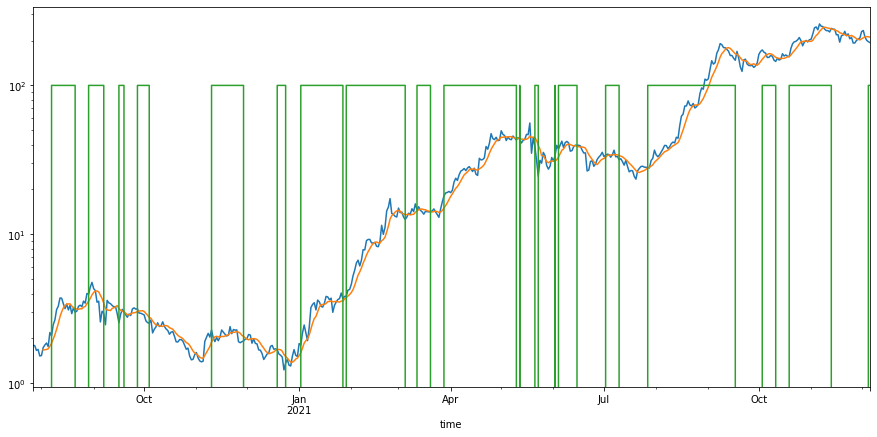

In [120]:
df["trend"] = [None] * window + trend 
df["close"].plot(figsize=(15,7),logy=True)
df["7d_average"].plot(figsize=(15,7),logy=True)
df["trend"] = df["trend"] * 100
df["trend"].plot(figsize=(15,7),logy=True)
plt.show()

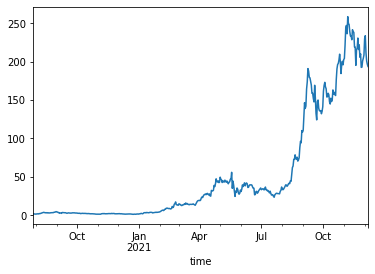

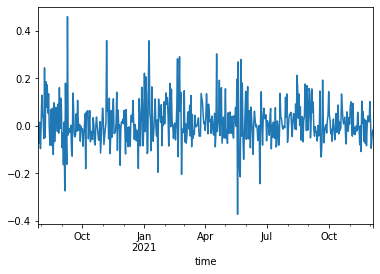

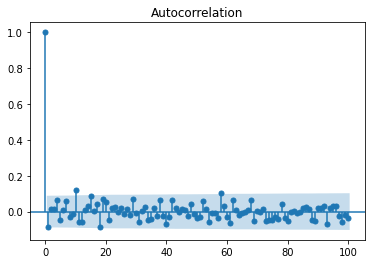

In [115]:
step = 24 * 30

for i in range(1,len(df),step):
    df["close"].iloc[i:i+step].plot()
    plt.show()
    r = df["close_changes_pct"].iloc[i:i+step].plot()
    plt.show()
    r = df["close_changes_pct"].iloc[i:i+step]
    sm.graphics.tsa.plot_acf(r, lags=100)
    plt.show() 